In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("simulated_nhis_healthcare_claims 1(2).csv")
df.head()

,Patient ID,Age,Gender,Date Admitted,Date Discharged,Diagnosis,Treatment,Amount Billed,Fraud Type
0,9b484756-3a0d-47f4-ada3-fb63ed2d1082,82,Male,2023-02-06,2023-02-06,Appendectomy,Appendectomy,144764.37,No Fraud
1,0240f93e-8c46-4c2a-a4cb-827ecf527d36,29,Male,2022-09-03,2022-09-04,Cesarean Section,Fake Cesarean Section,531434.03,Fake Treatment
2,0e0e0476-cf0f-4b87-828c-a34bdd780e68,70,Male,2022-10-02,2022-10-17,Advanced Spinal Surgery,Phantom Procedure,128604.41,Phantom Billing
3,ad669adf-568d-4346-b60e-a26a3374f00d,12,Male,2023-11-15,2023-11-20,Peptic Ulcer,Peptic Ulcer,304989.18,No Fraud
4,9c0cc9c5-ff6f-442b-9c25-60ad3f1a4400,72,Male,2022-11-15,2022-12-04,Appendectomy,Appendectomy,277021.33,No Fraud


In [4]:
df['Gender'].value_counts()

Gender
Male      759
Female    741
Name: count, dtype: int64

In [4]:
df.isnull().sum()

Patient ID         0
Age                0
Gender             0
Date Admitted      0
Date Discharged    0
Diagnosis          0
Treatment          0
Amount Billed      0
Fraud Type         0
dtype: int64

In [5]:
df.shape

(1500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient ID       1500 non-null   object 
 1   Age              1500 non-null   int64  
 2   Gender           1500 non-null   object 
 3   Date Admitted    1500 non-null   object 
 4   Date Discharged  1500 non-null   object 
 5   Diagnosis        1500 non-null   object 
 6   Treatment        1500 non-null   object 
 7   Amount Billed    1500 non-null   float64
 8   Fraud Type       1500 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 105.6+ KB


In [7]:
df[['Patient ID','Age','Gender','Date Admitted','Date Discharged','Diagnosis','Treatment','Amount Billed']]  

,Patient ID,Age,Gender,Date Admitted,Date Discharged,Diagnosis,Treatment,Amount Billed
0,9b484756-3a0d-47f4-ada3-fb63ed2d1082,82,Male,2023-02-06,2023-02-06,Appendectomy,Appendectomy,144764.37
1,0240f93e-8c46-4c2a-a4cb-827ecf527d36,29,Male,2022-09-03,2022-09-04,Cesarean Section,Fake Cesarean Section,531434.03
2,0e0e0476-cf0f-4b87-828c-a34bdd780e68,70,Male,2022-10-02,2022-10-17,Advanced Spinal Surgery,Phantom Procedure,128604.41
3,ad669adf-568d-4346-b60e-a26a3374f00d,12,Male,2023-11-15,2023-11-20,Peptic Ulcer,Peptic Ulcer,304989.18
4,9c0cc9c5-ff6f-442b-9c25-60ad3f1a4400,72,Male,2022-11-15,2022-12-04,Appendectomy,Appendectomy,277021.33
...,...,...,...,...,...,...,...,...
1495,7451a2b9-a318-4449-b411-7d17b1b72fa9,19,Male,2024-01-30,2024-01-30,Peptic Ulcer,Peptic Ulcer,147894.70
1496,29300ff5-1aef-418d-9f06-9b1717ccb6b2,100,Female,2023-12-30,2024-01-05,HIV/AIDS,HIV/AIDS,461244.61
1497,a75108fa-64fb-480f-8c73-392b6fc0c953,21,Male,2024-01-20,2024-01-21,Pneumonia,Pneumonia,256657.62
1498,8c638d95-5e6b-4ece-b320-9fc5e5a26f24,25,Male,2023-02-19,2023-02-21,Hepatitis B,Hepatitis B,458855.27


In [8]:
df[['Fraud Type']]

,Fraud Type
0,No Fraud
1,Fake Treatment
2,Phantom Billing
3,No Fraud
4,No Fraud
...,...
1495,Ghost Enrollee
1496,Ghost Enrollee
1497,No Fraud
1498,No Fraud


In [9]:
df[['Gender']]

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
1495,Male
1496,Female
1497,Male
1498,Male


In [10]:
#unique value fraud type column and how many .
unique_count = df['Fraud Type'].nunique()

print("Number of unique values:", unique_count)

chunk_size = 10000
value_counts = pd.Series(dtype=int)

for chunk in pd.read_csv('simulated_nhis_healthcare_claims 1(2).csv', chunksize=chunk_size):
    value_counts = value_counts.add(chunk['Fraud Type'].value_counts(), fill_value=0)

print(value_counts)

Number of unique values: 4
Fraud Type
Fake Treatment     243.0
Ghost Enrollee     164.0
No Fraud           887.0
Phantom Billing    206.0
dtype: float64


# ENCODING THE TARGET VARIABLE 

In [11]:
#'Fake Treatment':0, 'Ghost Enrollee':1, 'No Fraud':2, 'Phantom Billing':3

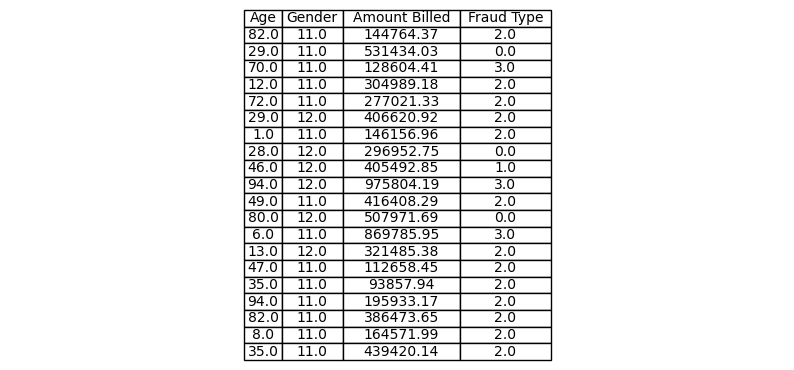

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset from a CSV file.
df = pd.read_csv('simulated_nhis_healthcare_claims 1(2).csv')

# Drop the unnecessary columns
columns_to_drop = ['Patient ID', 'Date Admitted', 'Date Discharged', 'Diagnosis', 'Treatment']
df = df.drop(columns=columns_to_drop, axis=1)

# Encoding the 'Fraud Type' column with LabelEncoder
label_encoder = LabelEncoder()
df['Fraud Type'] = label_encoder.fit_transform(df['Fraud Type'])

# Manually mapping 'Gender' column to custom values
gender_mapping = {'Male': 11, 'Female': 12}
df['Gender'] = df['Gender'].map(gender_mapping)

# Create a tabular display using Matplotlib
def display_table(df, num_rows=20):
    fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figure size as needed
    ax.axis('tight')
    ax.axis('off')

    # Convert the first 'num_rows' rows into a table
    table = plt.table(cellText=df.head(num_rows).values, 
                      colLabels=df.columns, 
                      cellLoc='center', 
                      loc='center')

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    plt.show()

# Display the first 20 rows in a table format
display_table(df, num_rows=20)


In [13]:
df[['Fraud Type']] #'Fake Treatment':0, 'Ghost Enrollee':1, 'No Fraud':2, 'Phantom Billing'

,Fraud Type
0,2
1,0
2,3
3,2
4,2
...,...
1495,1
1496,1
1497,2
1498,2


In [14]:
df[['Gender']] # Male:11 and Female:12

,Gender
0,11
1,11
2,11
3,11
4,11
...,...
1495,11
1496,12
1497,11
1498,11


# Splitting Data into Training and Testing Sets

In [15]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Gender'])  # Drop target column
y = df['Fraud Type']

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
(X_train)

array([[-0.51592854, -1.28642512, -1.89877633],
       [ 0.67353207,  1.73321371,  1.44217909],
       [ 0.46362725, -0.02059425,  0.32852728],
       ...,
       [-0.51592854,  0.97579124, -1.89877633],
       [ 0.81346861,  0.98560995,  1.44217909],
       [ 1.09334169, -1.35081236,  0.32852728]])

In [18]:
(X_test)

array([[ 0.32369071,  0.32132542,  0.32852728],
       [-0.58589681,  0.47998647,  0.32852728],
       [-1.70538914, -0.56595767,  0.32852728],
       [-1.74037327, -1.10158478,  1.44217909],
       [ 0.25372244,  0.66810824,  1.44217909],
       [ 0.7085162 ,  0.47396027,  0.32852728],
       [ 1.16330996,  0.14621608,  1.44217909],
       [ 1.65308785, -1.10258569, -1.89877633],
       [-0.09611891, -0.03821262, -0.78512452],
       [ 0.42864312,  2.4179616 ,  1.44217909],
       [ 1.65308785,  0.61654543,  0.32852728],
       [ 1.37321477, -0.72126757,  0.32852728],
       [-0.86576989, -0.18679199,  0.32852728],
       [ 1.3032465 , -1.36904028, -0.78512452],
       [ 0.28870658,  0.33550834,  0.32852728],
       [-0.72583335,  0.87298552,  0.32852728],
       [-0.4809444 , -0.64722438, -1.89877633],
       [-0.27103959, -1.53466481, -0.78512452],
       [ 0.32369071,  0.54489637, -1.89877633],
       [-0.4809444 ,  0.57815332,  0.32852728],
       [ 0.07880176,  0.76855374, -1.898

In [19]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [20]:
# Train models and evaluate
results = []
for model_name, model in models.items():       
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


In [21]:


# Evaluate metrics
# Accuracy: How many predictions were correct.
# Precision: Of all predicted frauds, how many were correct.
# Recall: Of all actual frauds, how many were predicted correctly.
# F1 Score: A balance between precision and recall

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 10

results.append({
    "Model": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    
    "F1 Score": f1
})
# Convert results into a DataFrame
results_df = pd.DataFrame(results)
# Display results
print("\nModel Evaluation Results:")
print(results_df)



Model Evaluation Results:
           Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest     100.0      100.0   100.0      10.0


In [25]:
# Save the best model
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
best_model = models[best_model_name]
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    

print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest
